In [1]:
from ODE_sim_tools import *
from KRAS_Variant import *
from pKRAS_model import *
import numpy as np
import matplotlib.pyplot as plt
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
from labellines import labelLine, labelLines
import time

/home/ca784/.conda/envs/bionetgen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pRAS = KRAS_Variant('pRAS',[1/3,1,1,1,1,1/3,1,1/8,1,1,1,2,1,1,1,1,1,1])

Basic Simulation

In [64]:
fract_pRAS = 1e-5
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':fract_pRAS,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
t,y = sim.integrate_model(2000)

fract_pRAS = 0
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':fract_pRAS,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
t2,y2 = sim.integrate_model(2000)

Text(0, 0.5, 'Activated Effector [% of total Effector]')

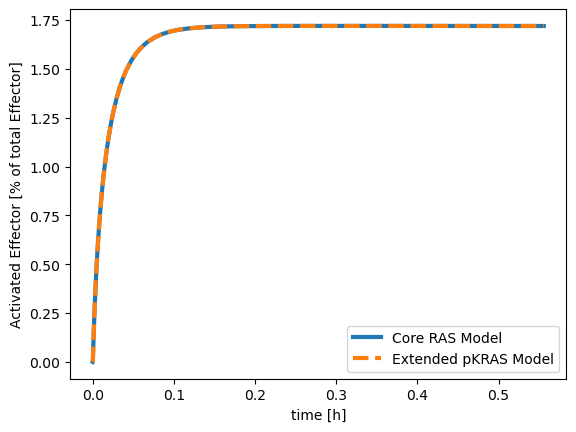

In [75]:
plt.plot(t/60/60,(y[4,:]+y[8,:])/(y[3,-1])*100,linewidth=3)
plt.plot(t/60/60,(y2[4,:]+y[8,:])/(y2[3,-1])*100,linestyle='--',linewidth=3)
plt.legend(['Core RAS Model','Extended pKRAS Model'])
plt.xlabel("time [h]")
plt.ylabel(r"Activated Effector [% of total Effector]")

Sobol Sensitivity Analysis

In [30]:
fract_pRAS = 1e-5
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':fract_pRAS,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)

In [31]:
test_range = [-.1,.1]
test_range_type = None

Src =   {'name':'$Src$','type':'kinetic','range':test_range,'ID':30,'range_type':test_range_type}
SHP2 =   {'name':'$SHP2$','type':'kinetic','range':test_range,'ID':31,'range_type':test_range_type}
k_Src =   {'name':'$k_{Src}$','type':'kinetic','range':test_range,'ID':32,'range_type':test_range_type}
Km_Src =   {'name':'$K_{M,Src}$','type':'kinetic','range':test_range,'ID':33,'range_type':test_range_type}
k_SHP2 =   {'name':'$k_{SHP2}$','type':'kinetic','range':test_range,'ID':34,'range_type':test_range_type}
Km_SHP2 =   {'name':'$K_{M,SHP2}$','type':'kinetic','range':test_range,'ID':35,'range_type':test_range_type}

params_to_modify = [Src,SHP2,k_Src,Km_Src,k_SHP2,Km_SHP2]

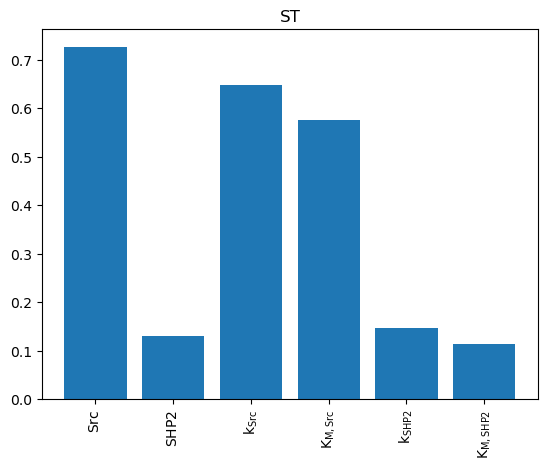

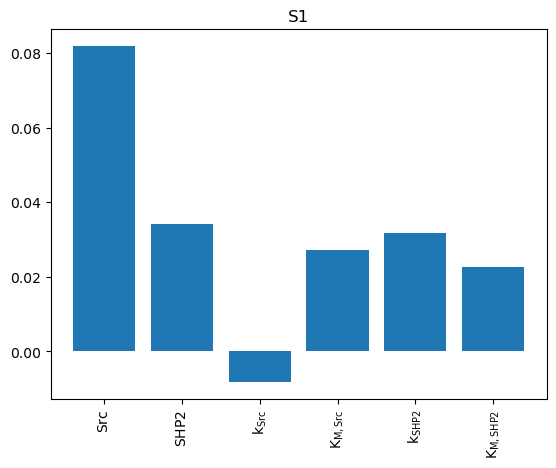

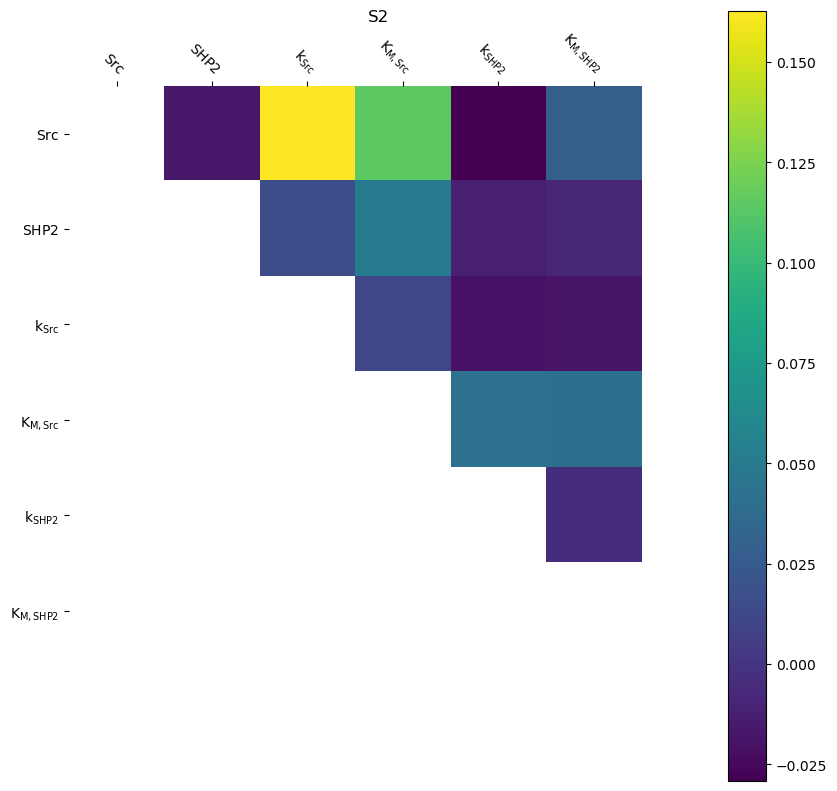

(['$Src$', '$SHP2$', '$k_{Src}$', '$K_{M,Src}$', '$k_{SHP2}$', '$K_{M,SHP2}$'],
 {'S1': array([ 0.08178961,  0.03410747, -0.00834983,  0.02727475,  0.03180188,
          0.02263463]),
  'S1_conf': array([0.13178837, 0.02029993, 0.06602947, 0.12482144, 0.01650556,
         0.01263499]),
  'ST': array([0.72563044, 0.1290868 , 0.64804425, 0.57574108, 0.14599506,
         0.11277563]),
  'ST_conf': array([0.3123343 , 0.06532289, 0.28403067, 0.21792812, 0.06499455,
         0.05046324]),
  'S2': array([[        nan, -0.01642287,  0.16274122,  0.11464838, -0.02914056,
           0.02888268],
         [        nan,         nan,  0.01644833,  0.05105807, -0.01216503,
          -0.00863305],
         [        nan,         nan,         nan,  0.01142173, -0.01972119,
          -0.0188973 ],
         [        nan,         nan,         nan,         nan,  0.04289077,
           0.04150077],
         [        nan,         nan,         nan,         nan,         nan,
          -0.00385602],
         [ 

In [32]:
sim.sobol_analysis_parralell(params_to_modify,out_option='total',plot_bar=True,solver='integration')

Spider Plots

100%|██████████| 300/300 [02:56<00:00,  1.70it/s] 


[Text(0.8497393189292689, 1.6827938807536929, '$Src$'),
 Text(0.906925114621716, 1.6826733255350974, '$SHP2$'),
 Text(0.9679594026177781, 1.6828234568756522, '$k_{Src}$'),
 Text(1.0331011789291682, 1.6828227977663617, '$K_{M,Src}$'),
 Text(1.102626869493085, 1.6830005347959263, '$k_{SHP2}$'),
 Text(1.1768315031721375, 1.682576868502905, '$K_{M,SHP2}$')]

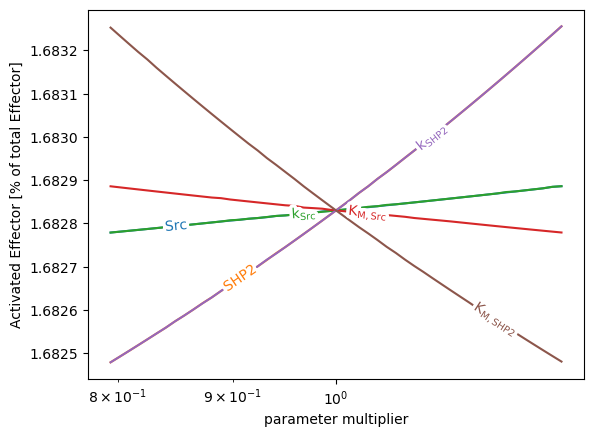

In [33]:
n_points = 50
multipliers = np.linspace(-0.1,0.1,n_points)
t = tqdm(range(len(params_to_modify)*n_points))

for param in params_to_modify:

    Y = []
    for multiplier in multipliers:
        get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':1e-5,'Src':5.2e-10,'SHP2':9.7e-9}
        sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
        k_new,y0_new = sim.get_modified_params([param],[np.power(10,multiplier)])
        res = sim.integrate_model_to_ss(k_new,y0_new)
        Y.append(res['per_RAS_GTP_Eff'])
        t.update()
    plt.semilogx(np.power(10,multipliers),Y,label=param['name'])
plt.xlabel("parameter multiplier")
plt.ylabel(r"Activated Effector [% of total Effector]")
labelLines()

Heatmaps

In [42]:
test_range = [-0.95,0.95]
test_range_type = None

Src =   {'name':'$Src$','type':'kinetic','range':test_range,'ID':30,'range_type':test_range_type}
SHP2 =   {'name':'$SHP2$','type':'kinetic','range':test_range,'ID':31,'range_type':test_range_type}
k_Src =   {'name':'$k_{Src}$','type':'kinetic','range':test_range,'ID':32,'range_type':test_range_type}
Km_Src =   {'name':'$K_{M,Src}$','type':'kinetic','range':test_range,'ID':33,'range_type':test_range_type}
k_SHP2 =   {'name':'$k_{SHP2}$','type':'kinetic','range':test_range,'ID':34,'range_type':test_range_type}
Km_SHP2 =   {'name':'$K_{M,SHP2}$','type':'kinetic','range':test_range,'ID':35,'range_type':test_range_type}

params_to_modify = [Src,SHP2,k_Src,Km_Src,k_SHP2,Km_SHP2]



























































































































































































Running simulations...: 100%|██████████| 2500/2500 [00:30<00:00, 81.47it/s]


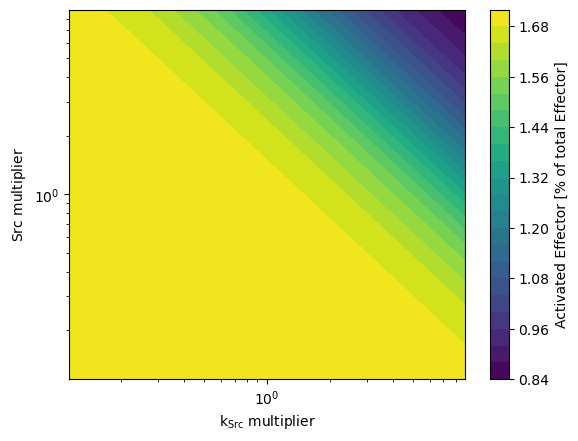

In [48]:
fract_pRAS = 1e-5
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':fract_pRAS,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,k_Src,out_option='per_RAS_GTP_Eff')
plt.colorbar(label=r"Activated Effector [% of total Effector]")